# Body Fat Prediction Using Decision Trees

In this microproject, I explore the Body Fat Prediction Dataset from Kaggle, which includes measurements from 252 men, such as body density, body fat percentage, age, weight, height, and various circumference metrics. The primary objective is to apply the Decision Tree model using sklearn to predict body fat percentage based on these measurements. This project is a hands-on opportunity to deepen my understanding of Decision Trees and their application in predictive modeling.

Results: After recognizing that density needed to be removed as a feature, the circumference of the abdomen was the most important feature in the final model I tested.

Dataset can be found [here](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset/data)

In [11]:
#including import statements here as I go
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
body_fat_df = pd.read_csv("bodyfat.csv")

In [6]:
body_fat_df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [8]:
#col names
body_fat_df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [62]:

features = ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
            'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
            'Wrist']
y = body_fat_df.BodyFat #target is Body Fat percentage
X = body_fat_df[features]
train_X, X_val, train_y, y_val = train_test_split(X, y)
body_fat_model = DecisionTreeRegressor(random_state=1)
body_fat_model.fit(train_X,train_y)
predictions = body_fat_model.predict(X)
print(mean_absolute_error(y, predictions))





0.16150793650793646


Now lets look at how changing the number of leaf nodes alters the performance of the model

In [84]:
features = [ 'Age', 'Density', 'Weight', 'Height', 'Neck', 'Chest',
            'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
            'Wrist']
y = body_fat_df.BodyFat #target is Body Fat percentage
X = body_fat_df[features]  

def get_mean_absolute_error(max_leaf_nodes, train_X, X_val, train_y, y_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state =0)
    
    model.fit(train_X, train_y)
    prediction = model.predict(X_val)
    mae =mean_absolute_error(y_val, prediction)
    return(mae)


mln_values = []
mae_values = []
for mln in [5, 6,7,8,9,10,11,12,13,14, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]:     
    mae_avg = 0
    for i in range(0, 100):
        train_X, X_val, train_y, y_val = train_test_split(X, y)
        current_mae = get_mean_absolute_error(mln, train_X, X_val, train_y, y_val)
        mae_avg += current_mae
    mln_values.append(mln)
    mae_values.append(mae_avg/100)
    
results_df = pd.DataFrame({
    'Max Leaf Nodes': mln_values,
    'Mean Absolute Error': mae_values
})

results_df

,Max Leaf Nodes,Mean Absolute Error
0,5,2.069048
1,6,1.888796
2,7,1.598798
3,8,1.405931
4,9,1.381401
5,10,1.304084
6,11,1.259881
7,12,1.241323
8,13,1.174161
9,14,1.137501


It seems like the best number of leaves is between 35 and 45 when taking all variables into account. However, I imagine some of these variables are unnecessary and causing some form of overfitting. So for the purposes of this exercise, lets assume the optimal number of leaves is 40. Now I am curious to see how looking at 5 variables and removing one at a time will change the performance of the model.

In [73]:
features1 = ['Density', 'Age', 'Weight', 'Height', 'Neck']
features2 = [ 'Age', 'Weight', 'Height', 'Neck']
features3 = ['Density', 'Weight', 'Height', 'Neck']
features4 = ['Density', 'Age', 'Height', 'Neck']
features5 = ['Density', 'Age', 'Weight',  'Neck']
features6 = ['Density', 'Age', 'Weight', 'Height']

for feature in [features1, features2, features3, features4, features5, features6]:
    y = body_fat_df.BodyFat #target is Body Fat percentage
    X = body_fat_df[feature]
    train_X, X_val, train_y, y_val = train_test_split(X, y, random_state =1)
    body_fat_model = DecisionTreeRegressor(random_state=1)
    body_fat_model.fit(train_X,train_y)
    predictions = body_fat_model.predict(X)
    print("feature:")
    print(feature)
    print(mean_absolute_error(y, predictions))

feature:
['Density', 'Age', 'Weight', 'Height', 'Neck']
0.1781746031746032
feature:
['Age', 'Weight', 'Height', 'Neck']
1.6325396825396825
feature:
['Density', 'Weight', 'Height', 'Neck']
0.13293650793650796
feature:
['Density', 'Age', 'Height', 'Neck']
0.15634920634920638
feature:
['Density', 'Age', 'Weight', 'Neck']
0.14960317460317463
feature:
['Density', 'Age', 'Weight', 'Height']
0.15753968253968256


At a first look, density seems to be a driving factor in predicting a man's body fat percentage. Why is that? Lets take a deeper look into how to determine which factor is most important in determining the performance of the model.

In [75]:
#Used chatgpt 4o to figure out how to determine which 
#features drive the success of the model
features = ['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
            'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
            'Wrist']
y = body_fat_df.BodyFat #target is Body Fat percentage
X = body_fat_df[features]
train_X, X_val, train_y, y_val = train_test_split(X, y)
body_fat_model = DecisionTreeRegressor(random_state=1)
body_fat_model.fit(train_X,train_y)
predictions = body_fat_model.predict(X)
print(mean_absolute_error(y, predictions))

print("Feature Importances:")
for feature, importance in zip(features, body_fat_model.feature_importances_):
    print(f"{feature}: {importance}")

0.1623015873015873
Feature Importances:
Density: 0.9807766445563335
Age: 1.1030274609876748e-05
Weight: 0.010572658529904848
Height: 7.905062360907708e-05
Neck: 5.746183372476555e-05
Chest: 0.0010537130550800817
Abdomen: 0.0020826905003719287
Hip: 1.4075442446788327e-05
Thigh: 0.0033571070964839647
Knee: 1.3831829019784072e-05
Ankle: 0.0010706085074997291
Biceps: 9.406185096658716e-06
Forearm: 0.00012286237166409084
Wrist: 0.0007788591941545939


It seems like density is the most important feature by far to determine a persons body fat percentage. However, density is used in the equation to determine a body fat percentage, so it would be more interesting to leave that feature out of the model. 

In [95]:
features = [ 'Age', 'Weight', 'Height', 'Neck', 'Chest',
            'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
            'Wrist']
y = body_fat_df.BodyFat #target is Body Fat percentage
X = body_fat_df[features]
train_X, X_val, train_y, y_val = train_test_split(X, y)
body_fat_model = DecisionTreeRegressor(random_state=1)
body_fat_model.fit(train_X,train_y)
predictions = body_fat_model.predict(X)
print(mean_absolute_error(y, predictions))

print("Feature Importances:")


importance_list = list(zip(features, body_fat_model.feature_importances_))
importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance}")

1.3138888888888889
Feature Importances:
Abdomen: 0.7022830465310157
Height: 0.07471996459354537
Weight: 0.04471227642929298
Knee: 0.03235155459236022
Wrist: 0.03147303688412368
Age: 0.030984519580567083
Thigh: 0.019670705414341037
Biceps: 0.01848575120774478
Forearm: 0.013431046417414475
Chest: 0.011333042340764045
Neck: 0.008358146452477039
Ankle: 0.006211485943778147
Hip: 0.005985423612575727


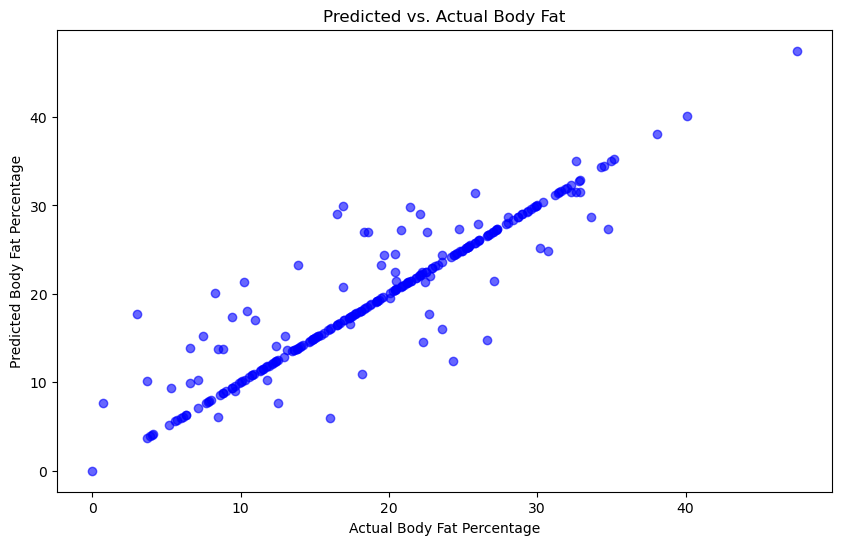

In [100]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, color='blue', alpha=0.6)

plt.xlabel('Actual Body Fat Percentage')
plt.ylabel('Predicted Body Fat Percentage')
plt.title('Predicted vs. Actual Body Fat')
plt.show()

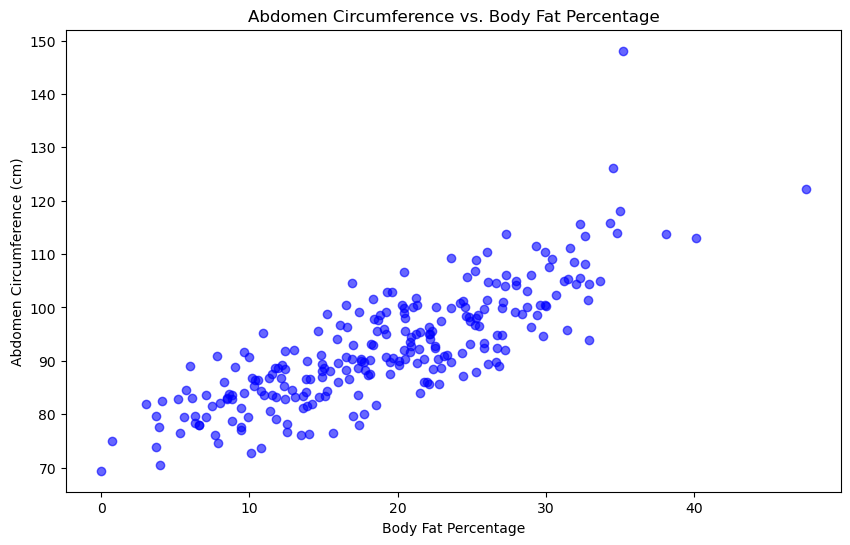

In [105]:

abdomen_values = body_fat_df['Abdomen']
body_fat_percentage = body_fat_df['BodyFat']

plt.figure(figsize=(10, 6))
plt.scatter(body_fat_percentage, abdomen_values, color='blue', alpha=0.6)
plt.xlabel('Body Fat Percentage')
plt.ylabel('Abdomen Circumference (cm)')
plt.title('Abdomen Circumference vs. Body Fat Percentage')
plt.show()